<a href="https://colab.research.google.com/github/nredick/code-playground/blob/main/KNNxMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to image-based classification with the K-Nearest Neighbors (KNN) algorithm**

> *You can use the connect button to connect to a local or hosted runtime: hosted runtime runs on a new machine instance in Google Cloud, local runtime runs on your machine*







We'll be using the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), the "hello world" of machine learning datasets. The MNIST dataset is a database of 70,000 handwritten digits [0-9] that are 28 x 28 pixels values (0-255). 

Supervised learning padradigmes work well for training models on the MNIST set. 

In [1]:
## imports 
!pip install numpy
!pip install pandas
!pip install matplotlib

# tensorflow and tf.keras 
import tensorflow as tf

# helper libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

Now we import the MNIST dataset, which (luckily for us) is built into Keras. 

Loading the dataset gives us four NumPy arrays. X_train and y_train comprise the *training set* that the KNN model will train on and x_test and y_test comprise the *test set* that the model will be evaluated against. 

It is also common to have a third set of data, called a *validation set*, which is used to determine whether a model's hyperparameters shouldbe tuned before final testing, but a train and test set will be sufficient for this model. 

The x_train/x_test arrays contain 28x28 2D feature arrays/matrices in which each 'slot' holds a pixel value ranging from 0 to 255, representing the image. They can also be imagined as a 784-dimensional feature vectors. 

The y_train/y_test arrays contain the *labels* for each of the image matrices in the x-arrays. Each 'slot' holds an integer value from 0-9. 

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Visualising the data

Shape of x_train:  (60000, 28, 28) 
Shape of y_train:  (60000,)
Number of labels:  60000


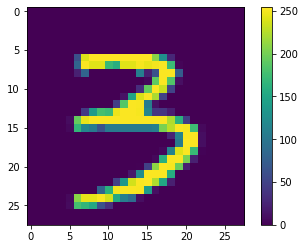

In [3]:
# the shape of our image arrays x_train and x_test
print("Shape of x_train: ", x_train.shape, "\nShape of y_train: ", y_train.shape)

# the number of labels for each set 
print("Number of labels: ", len(x_train))

# visualise a random image from the training data
plt.figure()
plt.imshow(x_train[randrange(len(x_train-1))])
plt.colorbar()
plt.grid(False)
plt.show()

# Data preprocessing

Notice that the image is not grayscale. We want to scale the pixel values to be betweeen 0 and 1 before the model trains on them because colour is irrelevant to being able to identify the digit in the image.

This is a form of prerocessing that is common in image analysis. 

Unlike most data, the MNIST dataset is mostly preprocessed for us. Preprocessing is critical for training a good model, but is usually the most time and computationally expenseive part of the ML process.

Examples of image prepocessing include:

* Resizing images
* Colour to grayscale
* Noise removal, such as Gaussian blur
* Segmentation

In [4]:
# scale the pixel values of each image to grayscale by dividing by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

Now our data looks like this: 

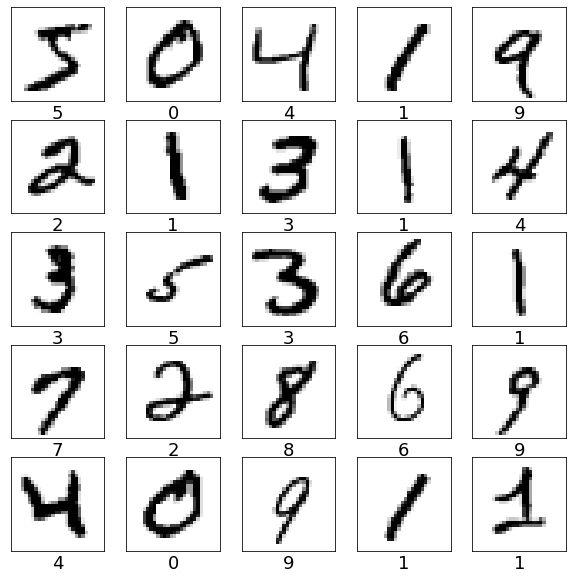

In [5]:
# show the first 10 images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="gray_r")
    plt.xlabel(y_train[i], fontsize=18)
plt.show()

# Implementation of a KNN with cross-fold validation without the sklearn library



```
# import the mnist data set from keras 
from tensorflow.keras.datasets import mnist 

# load the mnist data into our variables 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# reshape the 3D arrays to 2D arrays by flattening the images from 28x28 matrices to 1x784 arrays 
X_train = np.reshape(X_train, (-1, 784)) 
X_test = np.reshape(X_test, (-1, 784)) 

# define a function to perform a cross-validation to help determine the optimal k value 
def cv_fold(X_train_folds, y_train_folds, X_valid_fold, y_valid_fold):
  correct_count = 0
  for valid_idx, valid_image in enumerate(X_valid_fold): # give each image in the validation fold an index 
    distances = [] # define a local array var to keep track of distances 
    for train_image in X_train_folds: # iterate through each of the training images in the train set 
      distance = np.linalg.norm(valid_image - train image)

  
  accuracy = correct_count / X_valid_fold.shape[0] * 100 return accuracy

def cross_validate(k, num_folds=5):
  X_valid_fold, y_valid_fold))

fold_accuracies = np.array(fold_accuracies) cv_accuracy = np.mean(fold_accuracies)

increment = X_train.shape[0] // num_folds fold_accuracies = [] for i in range(num_folds):
X_valid_fold = X_train[i*increment:(i+1)*increment]
y_valid_fold = y_train[i*increment:(i+1)*increment]
X_train_folds = np.delete(X_train, np.s_[i*increment:(i+1)*increment], axis=0)
y_train_folds = np.delete(y_train, np.s_[i*increment:(i+1)*increment], axis=0)
fold_accuracies.append(cv_fold(X_train_folds, y_train_folds,
distances = [] for train_image in X_train_folds:
distance = np.linalg.norm(valid_image - train_image)
distances.append(distance) for i in range(k):
min_index = np.argmin(distances)
neighbour_indices.append(min_index)
distances[min_index] = np.Inf neighbour_labels = y_train_folds[neighbour_indices] prediction = np.argmin(neighbour_labels) if prediction.shape == 1:
prediction = np.random.choice(prediction) if prediction == y_valid_fold[valid_idx]:
correct_count += 1
print("K = {}, CV Accuracy: {}".format(cv_accuracy)) for k in [1,2,5,10]:
cross_validate(k)

```



# Training the KNN model using the sklearn library 

While it's possible to implement the KNN model ourselves, the sci-kit learn library has already implemented it.

So then we just need to figure out an optimal k-value for this dataset. In general, the smaller k is, the tighter the “fit” of the model.

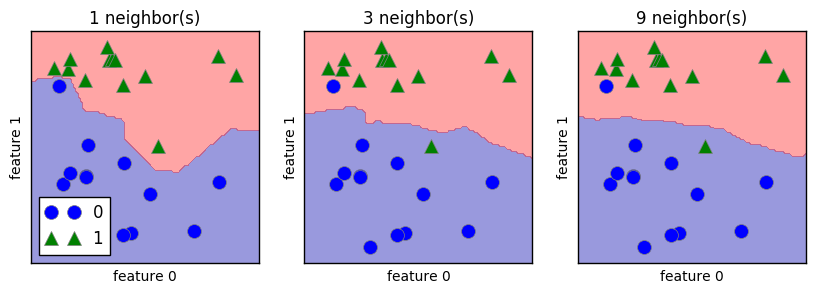

([Image Source](https://elvinouyang.github.io/assets/images/Introduction%20to%20Machine%20Learning%20with%20Python%20-%20Chapter%202%20-%20Datasets%20and%20kNN_files/Introduction%20to%20Machine%20Learning%20with%20Python%20-%20Chapter%202%20-%20Datasets%20and%20kNN_31_1.png))

For this example, we're going to use Euclidean distance (L2 norm), like in the self-implemented example. Minkowski distance is the default for the sklearn implementation and some other distance metrics we could use are: 

*   Manhattan distance
*   Chebyshev distance 

(amongst others which can be found in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric))

The sklearn.neighbors.KNeighborsClassifier has set [default parameters](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) so in theory we don't need to specifiy any, but we want to find our optimal k, and it can be good practice to see what parameters the model is using during training so that the code is more readable. 

In [6]:
# imports for sklearn 
from sklearn import neighbors 
from sklearn.metrics import classification_report

# reshape the image arrays from 3D to 2D; flatten the images from 28x28 to 1x784 
# note that passing -1 as a value prompts np to imply the value for the first parameter based on the second parameter 
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# check out the new shape of the arrays 
print(f'x_train shape: {x_train.shape}')

# train a knn that classifies inputs based on k neighbours using minkowski distance 
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', metric='minkowski') # you don't need to pass any parameters.
accuracy = cross_val_score(knn, x_train, y_train)
print(f'Accuracy: {accuracy}')

x_train shape: (60000, 784)


NameError: ignored

# Sources

[MNIST dataset](http://yann.lecun.com/exdb/mnist/)

McGill Artificial Intelligence Society Textbook 

[Distance metrics and K-Nearest Neighbor (KNN)](https://medium.com/@luigi.fiori.lf0303/distance-metrics-and-k-nearest-neighbor-knn-1b840969c0f4)